# 2. Plot the shear force and bending moment diagram

## Example 5

A beam is subjected to a uniformly-distributed load by its own weight. The distributed load is quantified as $wl$. The beam has a density of $\rho=$ 7850 kg/m<sup>3</sup>, length of $l=$ 200 mm, width of $b=$ 10 mm, height of $h=$ 100 mm and Young's modulus of $E=$ 210 GPa. The gravity is $g=$ 9.81 m/s<sup>2</sup>. Now plot its shear force and moment diagram.

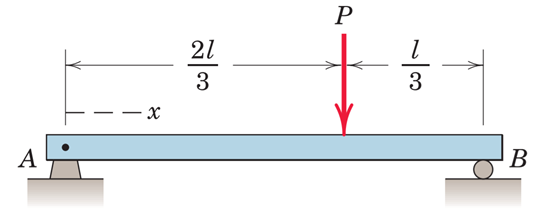

RA 1333.3333333333333
RC 2666.6666666666665
1000


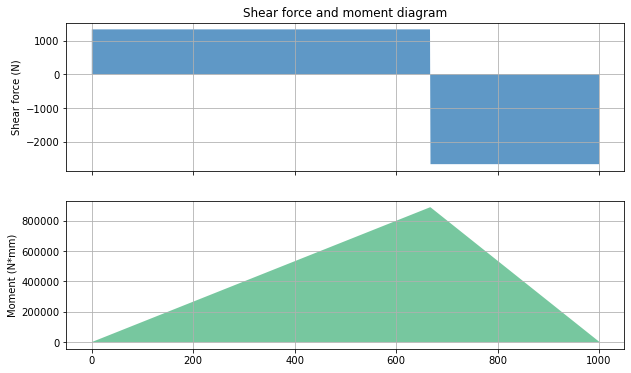

In [13]:
# Previous question
#Program to compute and graph a cantilever beam
#subject to Uniformly Distributed Load

import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAC=1000  #mm
LAB=2*LAC/3		   #mm, length
LBC=1*LAC/3      # mm, length
H=240           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=20  		     #mm, width
B1=75            #mm, point where load begins
B2=100          # mm

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)

#Applied load
w=7.0 # N/mm distributed load
P=4*1000  # N

# Moment of area
I0= (B0*h0**3)/12
I1= (B1*h**3)/12+B1*h*(h/2+h0/2)**2  # Use the parrallel theorem
I2= (B2*h**3)/12+B2*h*(h/2+h0/2)**2  # Use the parrallel theorem
I = I0+I1+I2     #Second moment of area for square cross section

#Reactions 
RA=1*P/3   #Vertical reaction force at the support A
RC=2*P/3 #Vertical reaction force at the support C
print('RA', RA)
print('RC', RC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAC,num=LAC, endpoint=True)
print(len(X))
V=np.zeros(LAC)
M=np.zeros(LAC)

for x in range(0, LAC):
    if x<=LAB:
        V[x]=1*P/3
        M[x]=1*P/3*x
    else:
        V[x]=-2*P/3
        M[x]=2*P/3*(LAC-x)

# # wrong results
# for x in range(0, LAC):
#     if x<=LAB:
#         V[x]=1*P/3
#         M[x]=-1*P/3*x
#     else:
#         V[x]=-2*P/3
#         M[x]=-2*P/3*(LAC-x)

# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
else:
    maxM=min(M)    
# maxy=min(y)

#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
# ax1.text(0.78, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
# ax2.text(0.68, 0.2, textstr2, transform=ax2.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)

Calculate the centroid position:

$${y_c} = {{\sum\limits_i {{A_i}{y_i}} } \over {\sum\limits_i {{A_i}} }}$$

Total area 10200
Total area*centroid distance 1124000.0
Centroid position yc= 110.19607843137256 mm
I= 76779607.84313726 mm^3
RA 14186.842105263157
RC 17513.157894736843
5300
[14186.84210526 14177.94210526 14169.04210526 ...  5000.
  5000.          5000.        ]
Maxium Bending stress= 16.228251060007974 MPa
Maxium Bending stress2= 19.11584021659302 MPa
TauBp= 0.8115544955714719
TauB= 3.043329358393019
Maxium shear stress= 4.370800640434927 MPa


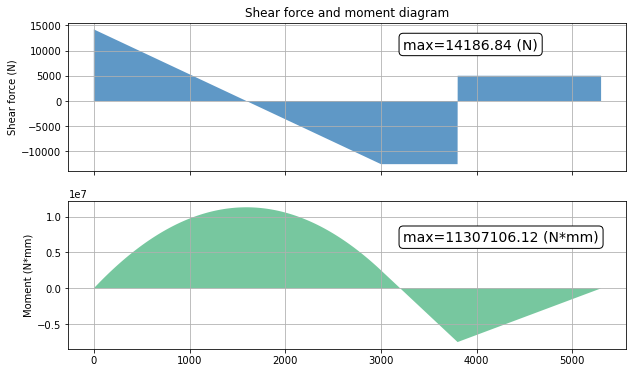

In [16]:
#New question
#Program to compute and graph a cantilever beam
#subject to Uniformly Distributed Load

import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAB=3000		   #mm, length
LBC=800      # mm
LCD=1500    # mm
LAD=LAB+LBC+LCD # mm
LAC=LAB+LBC   #mm
H=240           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=20  		     #mm, width
B1=75            #mm, point where load begins
B2=100          # mm

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)

#Applied load
w=8.9 # N/mm distributed load
P=5*1000  # N

# Centroid and 1st moment of area
A0=B0*(H-2*h)
y0=h+(H-2*h)/2
A1=B1*h
y1=H-h/2
A2=B2*h
y2=h/2

A=[A0, A1, A2]
y=[y0, y1, y2]

sumA=0
sumAY=0
for i in range(0,len(A)):
    sumA += A[i]
    sumAY += A[i]*y[i] 

print('Total area', sumA)
print('Total area*centroid distance', sumAY)
yc=sumAY/sumA
print('Centroid position yc=', yc, 'mm')

# 2nd moment of area, consider the centroid position
I0= (B0*h0**3)/12+B0*h0*(H/2-yc)**2
I1= (B1*h**3)/12+B1*h*(h/2+h0/2+H/2-yc)**2  # Use the parallel theorem
I2= (B2*h**3)/12+B2*h*(yc-h/2)**2  # Use the parallel theorem
I = I0+I1+I2   # mm^3     #Second moment of area for square cross section
print('I=', I, 'mm^3')

#Reactions 
RA=-(P*LAD+0.5*w*LAB**2)/LAC+w*LAB+P   #Vertical reaction force at the support A
RC=w*LAB+P-RA  #Vertical reaction force at the support C
print('RA', RA)
print('RC', RC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAD,num=LAD, endpoint=True)
print(len(X))
V=np.zeros(LAD)
M=np.zeros(LAD)
for x in range(0, LAD):
    if x<=LAB:
        V[x]=RA-w*x
        M[x]=0.5*w*x**2+x*V[x]
    elif (x<=LAC) & (x>LAB):
        V[x]=RA-w*LAB
        M[x]=0.5*w*LAB**2+x*V[x]
    elif (x<=LAD) & (x>LAC):
        V[x]=P
        M[x]=-P*(LAD-x)  # 0.5*w*LAB**2-RC*LAC

print(V)
# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
    minM=min(M)
else:
    maxM=min(M)    
    minM=max(M)
    
# maxy=min(y)

# Maxium bending stress
SigmaB=maxM*yc/I # Bottom half
SigmaB2=maxM*(H-yc)/I # Bottom half

print('Maxium Bending stress=', SigmaB, 'MPa')
print('Maxium Bending stress2=', SigmaB2, 'MPa')

# Maxium shear stress

QBp=B1*h*(H-yc-h/2)
TauBp=maxV*QBp/I/B1
TauB=maxV*QBp/I/B0

print('TauBp=',TauBp)
print('TauB=',TauB)

Qc=B1*h*(H-yc-h/2)+B0*(H-2*h)/2*(H-yc-h)
TauC=maxV*Qc/I/B0

print('Maxium shear stress=', TauC, 'MPa')


#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
ax1.text(0.6, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
ax2.text(0.6, 0.8, textstr2, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)

https://www.informit.com/articles/article.aspx?p=2982118&seqNum=9

Resit question:

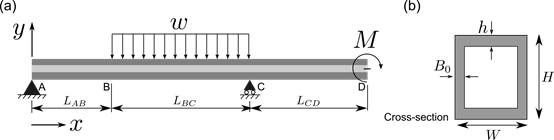

In [ ]:
#New question
#Program to compute and graph a cantilever beam
#subject to Uniformly Distributed Load

import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAB=800		   #mm, length
LBC=3000      # mm
LCD=1500    # mm
LAD=LAB+LBC+LCD # mm
LAC=LAB+LBC   #mm
H=240           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=30  		     #mm, width
W=180     # mm, total width

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)

#Applied load
w=8 # N/mm distributed load
Ma=5*10**6  # N*mm moment

# Centroid
yc=H/2

# 2nd moment of area, consider the centroid position
I0= (W*H**3)/12
I1= ((W-2*B0)*(H-2*h)**3)/12 
I = I0-I1  # mm^4     #Second moment of area: substraction
print(f'I0= {I0}, I1={I1}, I={I}')

#Reactions 
RA=w*LBC-(Ma+w*LBC*(LAB+LBC/2))/LAC   #Vertical reaction force at the support A
RC=w*LBC-RA  #Vertical reaction force at the support C
print('RA', RA)
print('RC', RC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAD,num=LAD, endpoint=True)
print(len(X))
V=np.zeros(LAD)
M=np.zeros(LAD)
for x in range(0, LAD):
    if x<=LAB:
        V[x]=-RA
        M[x]=-V[x]*x
    elif (x<=LAC) & (x>LAB):
        V[x]=w*(x-LAB)-RA
        M[x]=0.5*w*(x-LAB)**2-V[x]*x
    elif (x<=LAD) & (x>LAC):
        V[x]=0
        M[x]=-Ma 

# print(V)
# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
    minM=min(M)
else:
    maxM=min(M)    
    minM=max(M)
    
# maxy=min(y)

# Maxium bending stress
SigmaB=maxM*yc/I # Bottom half

print('Maxium Bending stress=', SigmaB, 'MPa')

# Maxium shear stress

QBp=W*h
TauBp=maxV*QBp/I/W
TauB=maxV*QBp/I/(2*B0)

print('TauBp=',TauBp)
print('TauB=',TauB)

# 1st moment of area with respect to the centriod
Qc=W*h+2*(H-2*h)/2*B0
TauC=maxV*Qc/I/(2*B0)

print('Maximum shear stress=', TauC, 'MPa')


#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
ax1.text(0.6, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
ax2.text(0.6, 0.8, textstr2, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)

In [30]:
4200-LAB**2/LAC

2848.0

# Modified exam question:


A wooden beam is loaded by a distributed load w = 8.9 kN/m as shown in Figure Q1a. The cross-section of the beam is shown in Figure Q1b. Assume that $L_{AB}$ = 3 m, $L_{BC}$ = 0.8 m, $W$=100 mm, $B_0$ = 20 mm, and $H$ = 240 mm, $h$=40 mm.

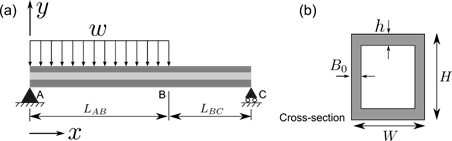

I0= 126666666.66666667, I1=18720000.0, I=215893333.33333334
Reaction force YA= 21252.0
Reaction force YC= 3174.0
5300
[21252. 21246. 21240. ...     0.     0.     0.]
Maximum shear force= 21252.0 N
Maximum bending moment= 9409323.0 N*mm at the position x= 1771.0
Maxium Bending stress= 4.3583203125 MPa
TauBp= 0.0039375
TauB= 0.012468749999999999
Maximum shear stress= 0.018375 MPa


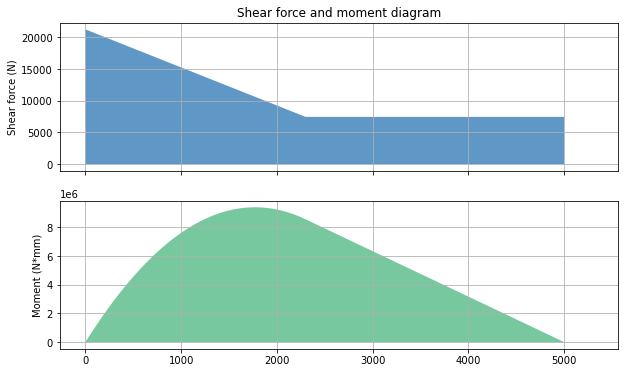

In [40]:
#New question
#Program to compute and graph a cantilever beam
#subject to Uniformly Distributed Load

import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAB=2300		   #mm, length
LBC=5000-LAB      # mm
LAC=LAB+LBC   #mm
H=200           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=30  		     #mm, width
W=190     # mm, total width
#Applied load
w=6 # N/mm distributed load

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)


Ma=5*10**6  # N*mm moment

# Centroid
yc=H/2

# 2nd moment of area, consider the centroid position
I0= (W*H**3)/12
I1= ((W-2*B0)*(H-2*h)**3)/12 
I = (I0-I1)*2  # mm^4     #Second moment of area: substraction
print(f'I0= {I0}, I1={I1}, I={I}')

#Reactions 
YA=(w*LAB-w*LAB**2/2/LAC)*2   #Vertical reaction force at the support A
YC=w*LAB**2/2/LAC  #Vertical reaction force at the support C
print('Reaction force YA=', YA)
print('Reaction force YC=', YC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAD,num=LAD, endpoint=True)
print(len(X))
V=np.zeros(LAD)
M=np.zeros(LAD)
for x in range(0, LAD):
    if x<=LAB:
        V[x]=YA-w*x
        M[x]=0.5*w*x*(-x+2*LAB-LAB**2/LAC)
    elif (x<=LAC) & (x>LAB):
        V[x]=YA-w*LAB
        M[x]=0.5*w*LAB**2*(1-x/LAC)
        

print(V)
# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
    minM=min(M)
else:
    maxM=min(M)    
    minM=max(M)

xmax=LAB-LAB**2/2/LAC
   
print('Maximum shear force=', maxV, 'N')

print('Maximum bending moment=', maxM, 'N*mm', "at the position x=", xmax)

# Maxium bending stress
SigmaB=maxM*yc/I # Bottom half

print('Maxium Bending stress=', SigmaB, 'MPa')

# Maxium shear stress

QBp=W*h
TauBp=maxV*QBp/I/W
TauB=maxV*QBp/I/(2*B0)

print('TauBp=',TauBp)
print('TauB=',TauB)

# 1st moment of area with respect to the centriod
Qc=W*h+2*(H-2*h)/2*B0
TauC=maxV*Qc/I/(2*B0)

print('Maximum shear stress=', TauC, 'MPa')


#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
# ax1.text(0.6, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
# ax2.text(0.6, 0.8, textstr2, transform=ax2.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)

In [41]:
2*LAB-LAB**2/LAC

3542.0

In [42]:
YA-w*LAB

7452.0

In [37]:
0.5*w*LAB**2

15870000.0

wrong answer 1:

I0= 207360000.0, I1=40960000.0, I=166400000.0
Reaction force YA= 16800.0
Reaction force YC= 7200.0
5300
[-7200. -7200. -7200. ...     0.     0.     0.]
Maximum shear force= -23200.0 N
Maximum bending moment= 36000000.0 N*mm
Maxium Bending stress= 25.96153846153846 MPa
TauBp= -0.0055769230769230765
TauB= -0.01673076923076923
Maximum shear stress= -0.027884615384615386 MPa


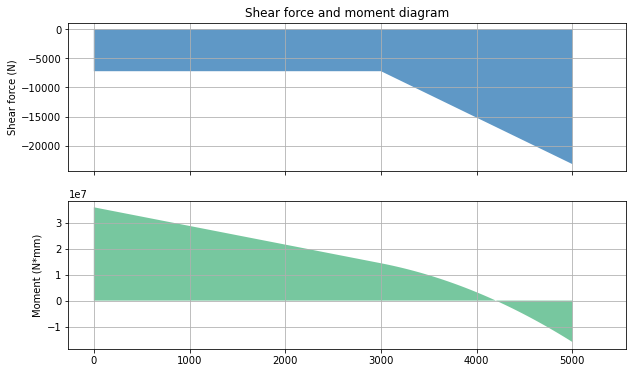

In [46]:
#New question
#Program to compute and graph a cantilever beam
#subject to Uniformly Distributed Load

import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAB=3000		   #mm, length
LBC=2000      # mm
LAC=LAB+LBC   #mm
H=240           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=30  		     #mm, width
W=180     # mm, total width

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)

#Applied load
w=8 # N/mm distributed load
Ma=5*10**6  # N*mm moment

# Centroid
yc=H/2

# 2nd moment of area, consider the centroid position
I0= (W*H**3)/12
I1= ((W-2*B0)*(H-2*h)**3)/12 
I = I0-I1  # mm^4     #Second moment of area: substraction
print(f'I0= {I0}, I1={I1}, I={I}')

#Reactions 
YA=w*LAB-w*LAB**2/2/LAC   #Vertical reaction force at the support A
YC=w*LAB**2/2/LAC  #Vertical reaction force at the support C
print('Reaction force YA=', YA)
print('Reaction force YC=', YC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAD,num=LAD, endpoint=True)
print(len(X))
V=np.zeros(LAD)
M=np.zeros(LAD)
for x in range(0, LAD):
    if x<=LAB:
        V[x]=YA-w*LAB 
        M[x]=0.5*w*LAB**2*(1-x/LAC)   
    elif (x<=LAC) & (x>LAB):
        V[x]=YA-w*x
        M[x]=0.5*w*x*(-x+2*LAB-LAB**2/LAC)
        

print(V)
# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
    minM=min(M)
else:
    maxM=min(M)    
    minM=max(M)
    
print('Maximum shear force=', maxV, 'N')

print('Maximum bending moment=', maxM, 'N*mm')

# Maxium bending stress
SigmaB=maxM*yc/I # Bottom half

print('Maxium Bending stress=', SigmaB, 'MPa')

# Maxium shear stress

QBp=W*h
TauBp=maxV*QBp/I/W
TauB=maxV*QBp/I/(2*B0)

print('TauBp=',TauBp)
print('TauB=',TauB)

# 1st moment of area with respect to the centriod
Qc=W*h+2*(H-2*h)/2*B0
TauC=maxV*Qc/I/(2*B0)

print('Maximum shear stress=', TauC, 'MPa')


#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
# ax1.text(0.6, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
# ax2.text(0.6, 0.8, textstr2, transform=ax2.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)